# Covid-19 India (till 22nd November) - EDA and Time Series Forecasting

Data and Source -
The data of Covid-19 cases for country India has been scrapped from the website - 'https://ourworldindata.org/coronavirus' till date 21st November 2020. The data contains various files listed below:
1. Covid_India.csv - This file contains 'Confirmed','Deaths','Recovered','Active' cases for India states respectively.
2. Case_perday,csv - This file consist of total cases (last day cases+new case) for 4 countries - India, US, Italy, China
3. Death_perday.csv = This file consist of new deaths per day for 4 countries - India, US, Italy, China

Objective-
1. To perform Exploratory Data Visualization of India cases for different States in terms of Recovery, Deaths and Active cases
2. To compare total cases and death of India with 3 other countries - US, Italy and China
3. To forecast the total cases in India for next 100 days
4. To forecast the new death cases in India for next 100 days


# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=10,12

# Import required dataset

In [3]:
df = pd.read_csv('Covid_India.csv')
df.drop(['Country_Region'], axis=1, inplace=True)
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active
0,Andaman and Nicobar Islands,4617,61,4408,148
1,Andhra Pradesh,859932,6920,837630,15382
2,Arunachal Pradesh,16001,49,14870,1082
3,Assam,211204,971,207029,3204
4,Bihar,228886,1212,222420,5254


In [4]:
India_cord = pd.read_csv('India_Cordinates.csv')
India_cord.drop(['Country_Region'], axis=1, inplace=True)
India_cord.head()

,Province_State,Lat,Long_
0,Andaman and Nicobar Islands,11.225999,92.968178
1,Andhra Pradesh,15.912900,79.740000
2,Arunachal Pradesh,27.768456,96.384277
3,Assam,26.357149,92.830441
4,Bihar,25.679658,85.604840


# Total Confirmed cases till date

In [5]:
total_confirmed_cases=df['Confirmed'].sum()
print('Total cases of confirmed COVID 2019 acorss India till date (11/21/2020 , 5:25:51 AM) :',total_confirmed_cases)

Total cases of confirmed COVID 2019 acorss India till date (11/21/2020 , 5:25:51 AM) : 9050597


In [6]:
df[['Province_State','Confirmed','Deaths','Recovered']].style.background_gradient(cmap ='Reds')

,Province_State,Confirmed,Deaths,Recovered
0,Andaman and Nicobar Islands,4617,61,4408
1,Andhra Pradesh,859932,6920,837630
2,Arunachal Pradesh,16001,49,14870
3,Assam,211204,971,207029
4,Bihar,228886,1212,222420
5,Chandigarh,16472,255,15096
6,Chhattisgarh,219404,2691,196896
7,Dadra and Nagar Haveli and Daman and Diu,3316,2,3275
8,Delhi,517238,8159,468143
9,Goa,46632,672,44665


# Total Active Cases till date

In [7]:
total_active_case = df['Active'].sum()
Total_case = df.groupby('Province_State')['Active'].sum().sort_values(ascending=False).to_frame()
print('Total active cases of COVID 2019 acorss India till date (11/21/2020 , 5:25:51 AM) :',total_active_case)

Total active cases of COVID 2019 acorss India till date (11/21/2020 , 5:25:51 AM) : 439747


In [8]:
Total_case.style.background_gradient(cmap ='Greens')

,Active
Province_State,
Maharashtra,79268
Kerala,67954
Delhi,40936
West Bengal,25599
Karnataka,24771
Uttar Pradesh,23357
Rajasthan,20923
Haryana,20150
Chhattisgarh,19817


# Confirmed vs Recovered

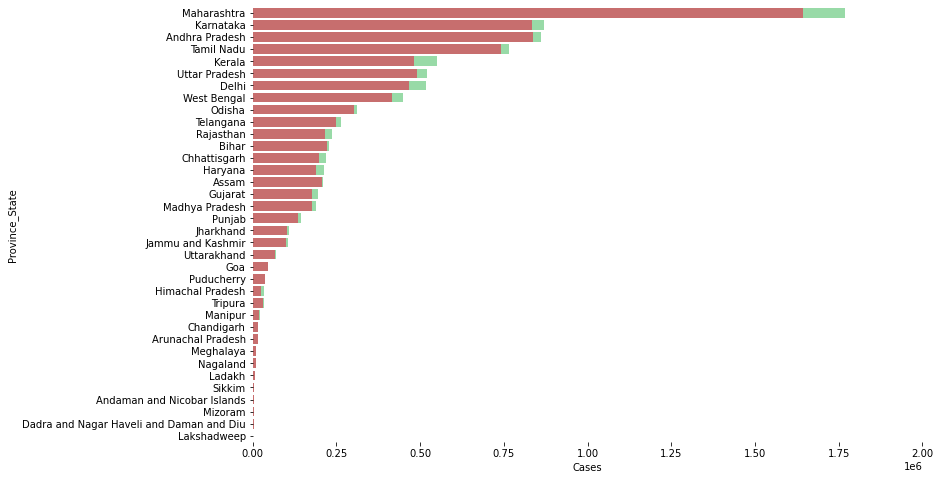

In [9]:
f,ax=plt.subplots(figsize=(12,8))
df.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes('pastel')
sns.barplot(x='Confirmed',y='Province_State',data = df,color='g')
sns.set_color_codes('muted')
sns.barplot(x='Recovered',y='Province_State',data = df,color='r')

ax.set(xlim=(0,2000000),xlabel='Cases')
sns.despine(left=True,bottom=True)

# Total_Cases per day

In [10]:
Cases_perday = pd.read_csv('Case_perday.csv')
Cases_perday.head()

,date,India,United States,Italy,China
0,2/1/2020,1.0,7,3,11809
1,2/2/2020,2.0,8,3,14399
2,2/3/2020,2.0,11,3,17211
3,2/4/2020,3.0,11,3,20448
4,2/5/2020,3.0,11,3,24320


# Visualizing trend of total_cases per day for - India, US, China and Italy

In [11]:
fig = px.bar(Cases_perday,x='date',y='India',color='India',orientation='v',height=400,
             title = 'Covid 19 cases in India per day',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Cases_perday,x='date',y='United States',color='United States',orientation='v',height=400,
             title = 'Covid 19 cases in United States per day',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Cases_perday,x='date',y='Italy',color='Italy',orientation='v',height=400,
             title = 'Covid 19 cases in Italy per day',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Cases_perday,x='date',y='China',color='China',orientation='v',height=400,
             title = 'Covid 19 cases in China per day',color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

# New_Deaths per day

In [12]:
Death_perday = pd.read_csv('Death_perday.csv')
Death_perday.head()

,date,India,United States,Italy,China
0,2/1/2020,0.0,0,0,46
1,2/2/2020,0.0,0,0,45
2,2/3/2020,0.0,0,0,57
3,2/4/2020,0.0,0,0,65
4,2/5/2020,0.0,0,0,66


# Visualizing trend of new death_cases per day for - India, US, China and Italy

In [13]:
fig = px.bar(Death_perday,x='date',y='India',color='India',orientation='v',height=400,
             title = 'Covid 19 death cases in India per day',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Death_perday,x='date',y='United States',color='United States',orientation='v',height=400,
             title = 'Covid 19 death cases in United States per day',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Death_perday,x='date',y='Italy',color='Italy',orientation='v',height=400,
             title = 'Covid 19 death cases in Italy per day',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Death_perday,x='date',y='China',color='China',orientation='v',height=400,
             title = 'Covid 19 death cases in China per day',color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

# Installing FBProhet package for Time-Series forecasting

In [14]:
!pip install fbprophet

In [15]:
from fbprophet import Prophet

In [16]:
India = Cases_perday[['date','India']]
India.head() 

,date,India
0,2/1/2020,1.0
1,2/2/2020,2.0
2,2/3/2020,2.0
3,2/4/2020,3.0
4,2/5/2020,3.0


# Creating a future datetime series for next 100 days

In [17]:
India.columns = ['ds','y']

India['ds']=pd.to_datetime(India['ds'])
m=Prophet(interval_width=0.95)
m.fit(India)
future = m.make_future_dataframe(periods=100)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
390,2021-02-25
391,2021-02-26
392,2021-02-27
393,2021-02-28
394,2021-03-01


# Forecasted Total_case per day

In [18]:
forecasted_case = m.predict(future)
forecasted_case[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
390,2021-02-25,1.487577e+07,1.218294e+07,1.775324e+07
391,2021-02-26,1.493488e+07,1.219711e+07,1.793619e+07
392,2021-02-27,1.499344e+07,1.219661e+07,1.802191e+07
393,2021-02-28,1.505783e+07,1.229435e+07,1.809269e+07
394,2021-03-01,1.511466e+07,1.222468e+07,1.828181e+07


# Visualiszing Forecasted Total cases till March 2021

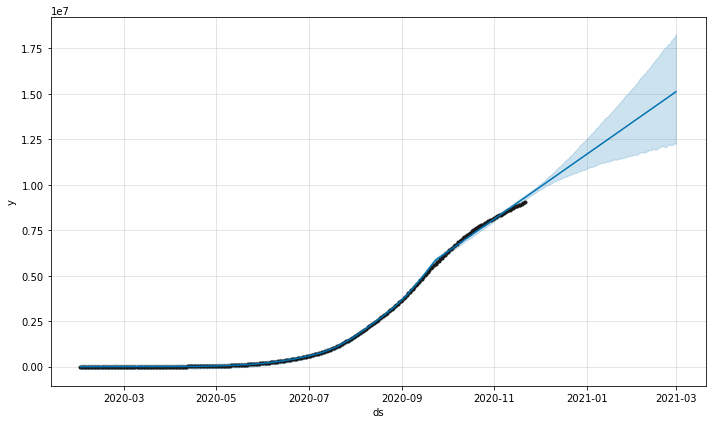

In [19]:
confirmed_forecast_plot = m.plot(forecasted_case)

# Visualizing Monthly and Weekly trend for Total case per day

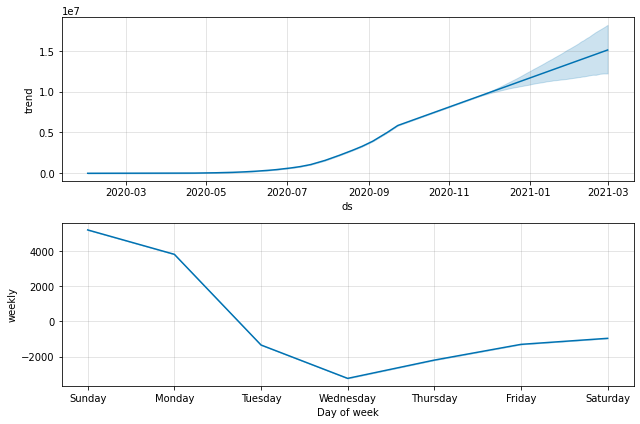

In [20]:
confirmed_forecast_plot = m.plot_components(forecasted_case)

# New Death per day

In [21]:
India_d = Death_perday[['date','India']]
India_d.head()
India_d.columns = ['ds','y']

India_d['ds']=pd.to_datetime(India_d['ds'])

# Creating a datetime series for next 100 days

In [22]:
c=Prophet(interval_width=0.95)
c.fit(India_d)
future = c.make_future_dataframe(periods=100)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
390,2021-02-25
391,2021-02-26
392,2021-02-27
393,2021-02-28
394,2021-03-01


# Forecasted New Deaths per day 

In [23]:
forecasted_death = c.predict(future)
forecasted_death[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
390,2021-02-25,-535.663493,-1089.850060,28.024362
391,2021-02-26,-547.569418,-1085.160869,-16.147942
392,2021-02-27,-561.043694,-1100.619910,-9.888433
393,2021-02-28,-591.300474,-1151.746922,-34.630184
394,2021-03-01,-623.948509,-1174.703463,-82.999319


# Visualiszing Forecasted New Death cases till March 2021

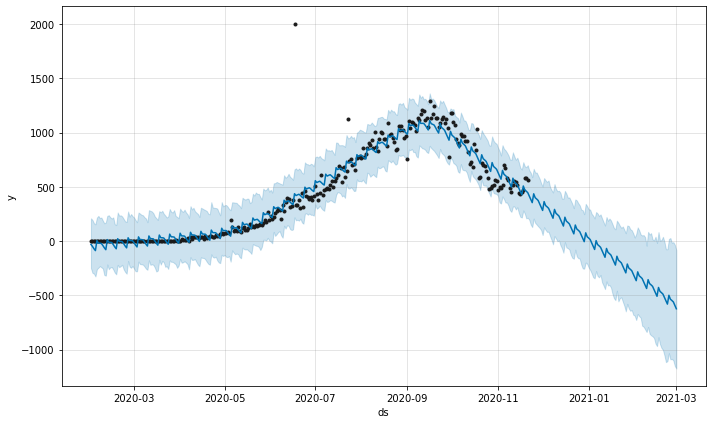

In [24]:
confirmed_forecast_plot = c.plot(forecasted_death)

# Visualizing Monthly and Weekly trend for New death case per day

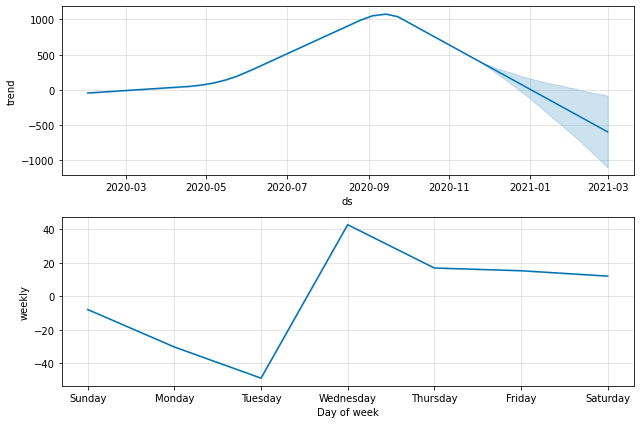

In [25]:
confirmed_forecast_plot = c.plot_components(forecasted_death)

# Merging Forecasted Total case and New deaths per day till March 2021 

In [26]:
Forecast = pd.merge(forecasted_case,forecasted_death,on='ds')

In [27]:
Forecast.to_csv ('Forecasted Cases and Deaths _output.csv', index = False, header=True)